In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import seaborn as sns
from pandas import DataFrame

In [3]:

df = pd.read_csv('data.csv')
df.head()

,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,Adams,Washington,46.929839,-118.352109,11/30/2014 0:00,18.61,-3.01,0.00,6.77,0.69,...,0,1027.95,23.93,6.96,10.00,9,3.80,136.179718,0,35.6
1,Adams,Washington,47.150327,-118.958859,11/30/2014 0:00,19.67,-0.74,0.00,6.66,0.65,...,0,1028.26,25.88,8.71,10.00,352,6.03,135.697540,0,35.6
2,Adams,Washington,46.811686,-118.695237,11/30/2014 0:00,20.66,-0.14,0.00,6.55,0.67,...,0,1028.29,24.67,8.26,10.00,25,3.59,135.676956,0,35.6
3,Adams,Washington,47.162342,-118.699677,11/30/2014 0:00,19.69,-2.66,0.03,7.32,0.69,...,0,1027.74,25.48,8.10,10.00,1,5.18,135.005798,0,35.6
4,Adams,Washington,47.157512,-118.434056,11/30/2014 0:00,18.82,-3.04,0.04,7.62,0.70,...,0,1027.16,24.83,8.32,9.99,5,4.69,134.803864,0,35.6


In [4]:
# drop unwanted columns.
df = df.drop(['CountyName'], axis=1)
df = df.drop(['State'], axis=1)
df = df.drop(['Date'], axis=1)
df = df.drop(['cloudCover'], axis=1)
df = df.drop(['dewPoint'], axis=1)
df = df.drop(['precipIntensity'], axis=1)


In [5]:
df = df.drop(['precipIntensityMax'], axis=1)
df = df.drop(['precipProbability'], axis=1)
df = df.drop(['precipAccumulation'], axis=1)
df = df.drop(['precipTypeIsRain'], axis=1)
df = df.drop(['precipTypeIsSnow'], axis=1)
df = df.drop(['precipTypeIsOther'], axis=1)


In [6]:
df = df.drop(['visibility'], axis=1)
df = df.drop(['windBearing'], axis=1)
df = df.drop(['windSpeed'], axis=1)
df = df.drop(['NDVI'], axis=1)
df = df.drop(['DayInSeason'], axis=1)



In [7]:
# rename columns.
df = df.rename(index=str, columns={"apparentTemperatureMax":"ATMAX"})
df = df.rename(index=str, columns={"apparentTemperatureMin":"ATMIN"})
df = df.rename(index=str, columns={"temperatureMax":"tempmax"})
df = df.rename(index=str, columns={"temperatureMin":"tempmin"})
df.head()

,Latitude,Longitude,ATMAX,ATMIN,humidity,pressure,tempmax,tempmin,Yield
0,46.929839,-118.352109,18.61,-3.01,0.69,1027.95,23.93,6.96,35.6
1,47.150327,-118.958859,19.67,-0.74,0.65,1028.26,25.88,8.71,35.6
2,46.811686,-118.695237,20.66,-0.14,0.67,1028.29,24.67,8.26,35.6
3,47.162342,-118.699677,19.69,-2.66,0.69,1027.74,25.48,8.10,35.6
4,47.157512,-118.434056,18.82,-3.04,0.70,1027.16,24.83,8.32,35.6


In [8]:
df.isnull().sum()

Latitude       0
Longitude      0
ATMAX          0
ATMIN          0
humidity       0
pressure     351
tempmax        0
tempmin        0
Yield          0
dtype: int64

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:,8]

In [10]:
X=X.fillna(0)

In [11]:
X.isnull().sum()

Latitude     0
Longitude    0
ATMAX        0
ATMIN        0
humidity     0
pressure     0
tempmax      0
tempmin      0
dtype: int64

In [12]:
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn import preprocessing
columns_to_scale = df.columns.tolist()
columns_to_scale = [x for x in columns_to_scale if x != 'Yield']
print(columns_to_scale)

std_scaler = preprocessing.StandardScaler().fit(X_train[columns_to_scale])
minmax_scaler = preprocessing.MinMaxScaler().fit(X_train[columns_to_scale])

X_train[columns_to_scale] = std_scaler.transform(X_train[columns_to_scale])






['Latitude', 'Longitude', 'ATMAX', 'ATMIN', 'humidity', 'pressure', 'tempmax', 'tempmin']


/home/kanhaiya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/kanhaiya/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/kanhaiya/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [14]:
# apply scaler on test set
X_test[columns_to_scale] = std_scaler.transform(X_test[columns_to_scale])




/home/kanhaiya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kanhaiya/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/kanhaiya/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [15]:
from sklearn.model_selection import cross_val_score
cv_k = 5
cv_scoring = 'neg_mean_squared_error'
cv_scoring = 'r2'

In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=cv_k, shuffle=True)

In [17]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [18]:
import time
# Random forest regression
now = time.time()
est_best = RandomForestRegressor(n_estimators=10, n_jobs=-1)
est_best.fit(X_train, y_train)
scores = cross_val_score(est_best, X_train, y_train, cv=kf, scoring=cv_scoring)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
after = time.time()
print('Exec. time: {:5.2f} s'.format(after-now))

Accuracy: 0.9999 (+/- 0.0002)
Exec. time: 20.14 s


In [19]:
# Predicting the Test set results
y_pred = est_best.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [20]:
score

0.9999938337947161

In [21]:
y_test[100]

33.9

In [22]:
y_pred[100]

33.90000000000005

In [23]:
y_pred.shape

(36510,)

In [24]:
y_test.dtypes

dtype('float64')

In [25]:
import pickle
from sklearn.externals import joblib
joblib.dump(est_best, "best_regression_model.pkl")

/home/kanhaiya/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['best_regression_model.pkl']

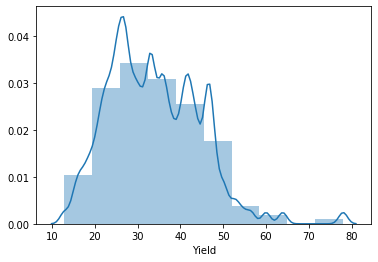

In [26]:
#kernel density estimation plot for actual Yeild
sns.distplot(df['Yield'],bins=10,kde=True)

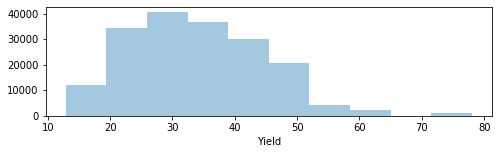

In [27]:
fig,ax=plt.subplots(figsize=(8,2))
sns.distplot(df['Yield'],bins=10,kde=False,ax=ax)

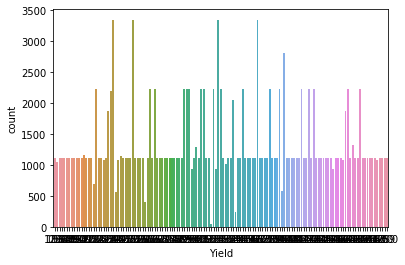

In [28]:
#count plot for actual yield
sns.countplot(x='Yield',data=df)

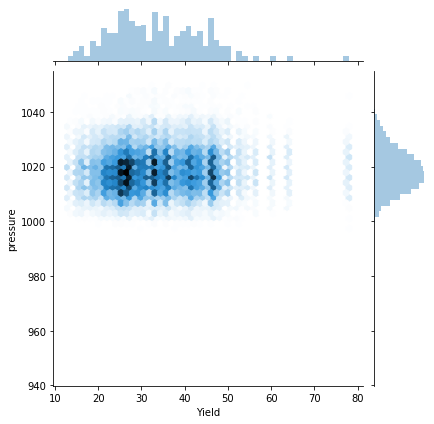

In [29]:
sns.jointplot('Yield','pressure',data=df,kind='hex')

In [30]:
y_test.shape

(36510,)

In [31]:
y_pred.shape

(36510,)

In [32]:
pred_df = pd.DataFrame(y_pred)
pred_df['mak']=pred_df
pred_df

,0,mak
0,42.2,42.2
1,29.3,29.3
2,34.9,34.9
3,46.0,46.0
4,46.0,46.0
...,...,...
36505,21.4,21.4
36506,36.2,36.2
36507,53.0,53.0
36508,39.3,39.3


In [33]:
test_df=pd.DataFrame(y_test)
test_df

,Yield
102981,42.2
30150,29.3
145055,34.9
124736,46.0
147332,46.0
...,...
40088,21.4
51768,36.2
67379,53.0
24761,39.3


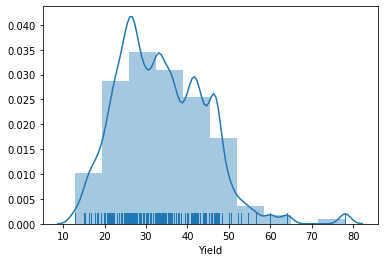

In [34]:
#distribution plot for actual value
sns.distplot(test_df['Yield'],bins=10,kde=True,rug=True)

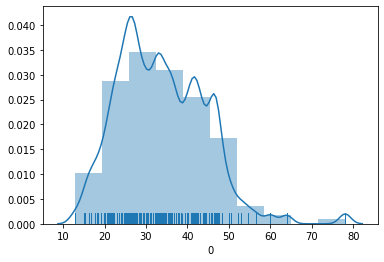

In [35]:
#distribution plot for predicted value
sns.distplot(pred_df[0],bins=10,kde=True,rug=True)

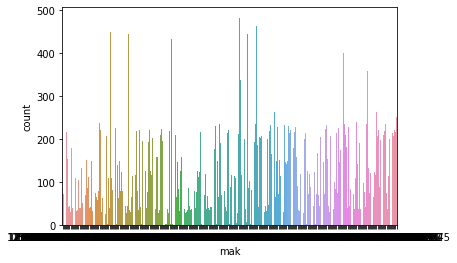

In [36]:
#count plot for predicted data
sns.countplot(x='mak',data=pred_df)

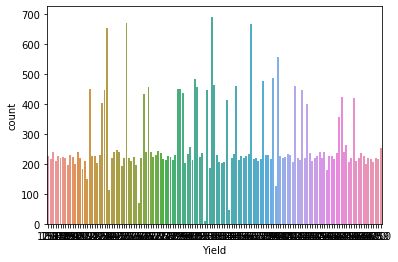

In [37]:
#count plot for actual data
sns.countplot(x='Yield',data=test_df)